<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 03: NYC 311 Service Request Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [12]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [80]:
#import dataset ans view top5
data=pd.read_csv("311_Service_Requests.csv")
data.head()

c:\users\acer\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [81]:
#check for NaN Values in Data
data.isnull().sum(axis=0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [82]:
#know your data
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [83]:
#check for Null Values if there then we clean data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

## Basic data exploratory analysis
1. Explore data
2. Find patterns

In [84]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [85]:
#Get unique city Name
data['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', nan, 'RIDGEWOOD',
       'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND', 'OZONE PARK',
       'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [86]:
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [87]:
#find two major city names with maximum number of incident
data.groupby('City').size().sort_values(ascending=False)

City
BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT

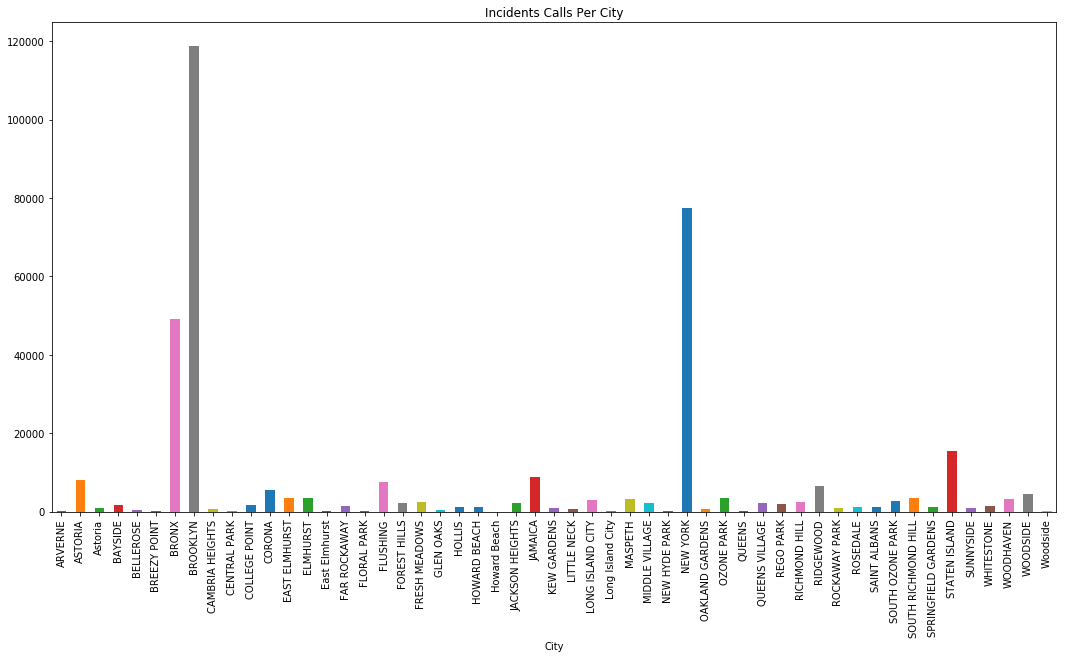

In [97]:
#visualize the above exploration
data.groupby('City').size().plot(kind='bar', figsize=(18,9), title=('Incidents Calls Per City'))

In [113]:
#Display the complaint type and city together
City_Complaints=data.groupby(['City','Complaint Type']).size()
City_Complaints

City       Complaint Type           
ARVERNE    Animal Abuse                   46
           Blocked Driveway               50
           Derelict Vehicle               32
           Disorderly Youth                2
           Drinking                        1
           Graffiti                        1
           Homeless Encampment             4
           Illegal Parking                62
           Noise - Commercial              2
           Noise - House of Worship       14
           Noise - Park                    2
           Noise - Street/Sidewalk        29
           Noise - Vehicle                10
           Panhandling                     1
           Traffic                         1
           Urinating in Public             1
           Vending                         1
ASTORIA    Animal Abuse                  170
           Bike/Roller/Skate Chronic      16
           Blocked Driveway             3436
           Derelict Vehicle              426
           Disorde

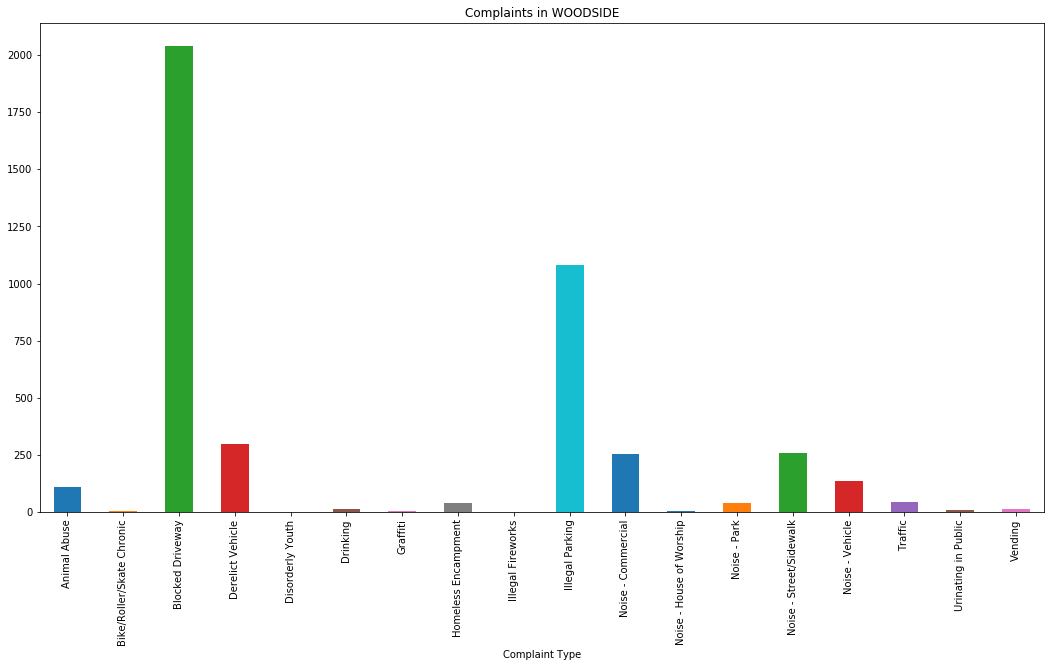

In [110]:
#Visualize Above Exploration for City = WOODSIDE
City_Complaints['WOODSIDE'].plot(kind='bar', figsize=(18,9), title=('Complaints in WOODSIDE'))

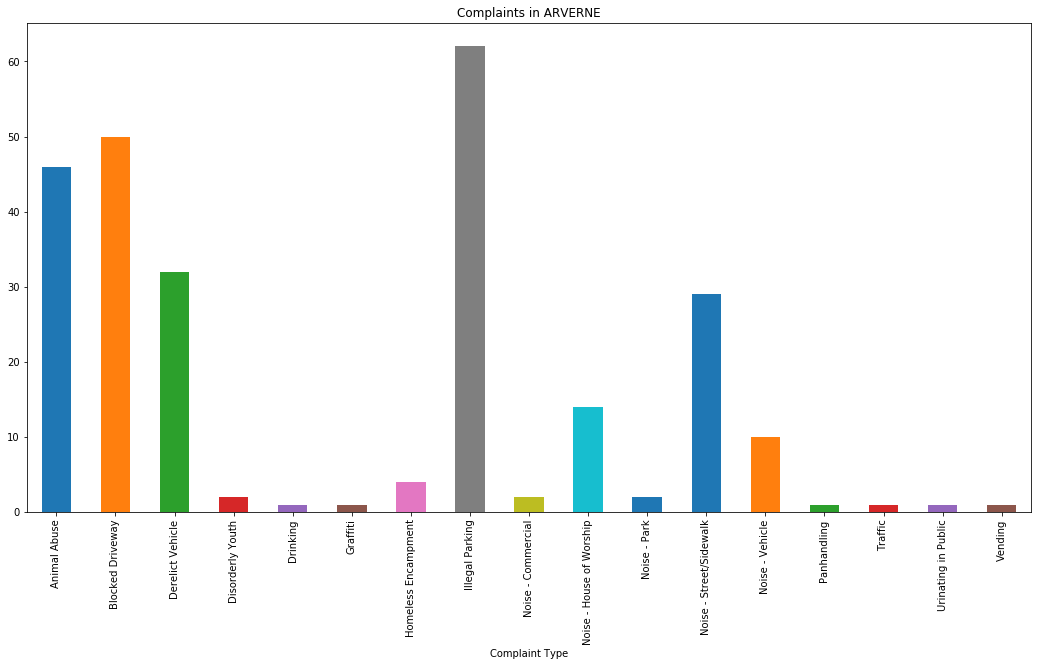

In [111]:
#Visualize Above Exploration for City = ARVERNE
City_Complaints['ARVERNE'].plot(kind='bar', figsize=(18,9), title=('Complaints in ARVERNE'))

### Find major complaint types
1. Find the top 10 complaint types 
2. Plot a bar graph of count vs. complaint types


In [120]:
#Top 10 reported complaint type
complaint_counts = data['Complaint Type'].value_counts()
complaint_counts[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [115]:
#Another Way To Do Above Operation
#Top 10 reported complaint type
data.groupby('Complaint Type').size().sort_values(ascending=False).nlargest(10)

Complaint Type
Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
dtype: int64

In [116]:
#Another way to do this,finding all
#most reported complaint type
unique, counts = np.unique(data['Complaint Type'], return_counts=True)
dict(zip(unique, counts))

{'Agency Issues': 8,
 'Animal Abuse': 10541,
 'Animal in a Park': 1,
 'Bike/Roller/Skate Chronic': 478,
 'Blocked Driveway': 100881,
 'Derelict Vehicle': 21661,
 'Disorderly Youth': 315,
 'Drinking': 1409,
 'Ferry Complaint': 2,
 'Graffiti': 157,
 'Homeless Encampment': 4879,
 'Illegal Fireworks': 172,
 'Illegal Parking': 92679,
 'Noise - Commercial': 44109,
 'Noise - House of Worship': 1070,
 'Noise - Park': 4109,
 'Noise - Street/Sidewalk': 51692,
 'Noise - Vehicle': 19352,
 'Panhandling': 327,
 'Posting Advertisement': 681,
 'Squeegee': 4,
 'Traffic': 5198,
 'Urinating in Public': 641,
 'Vending': 4192}

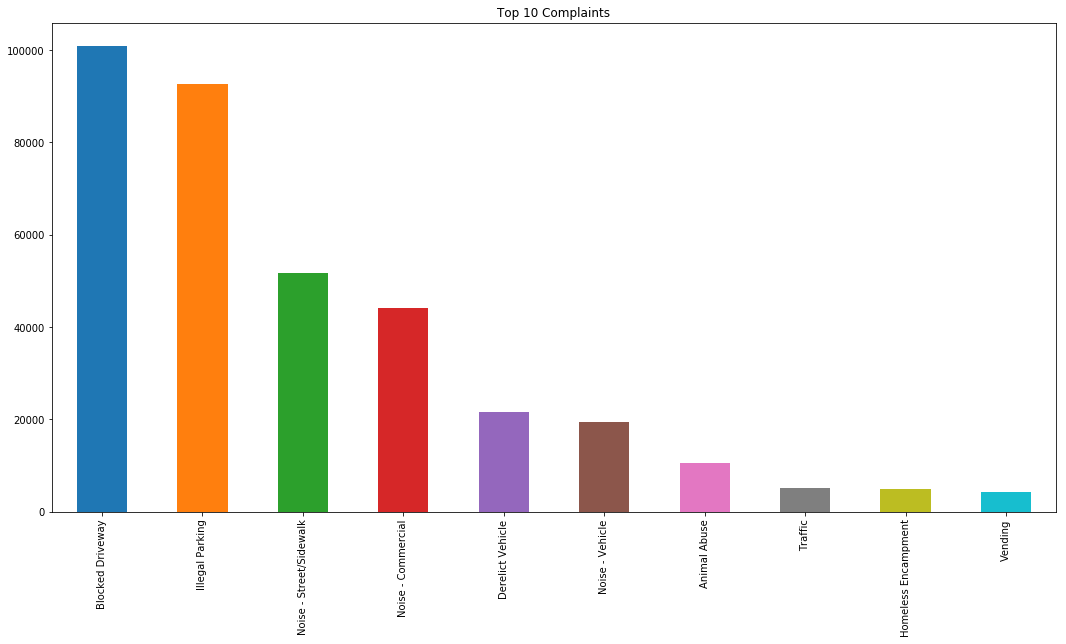

In [122]:
complaint_counts[:10].plot(kind='bar', figsize=(18,9), title=('Top 10 Complaints'))

### Visualize the complaint types
1. Display the major complaint types and their count


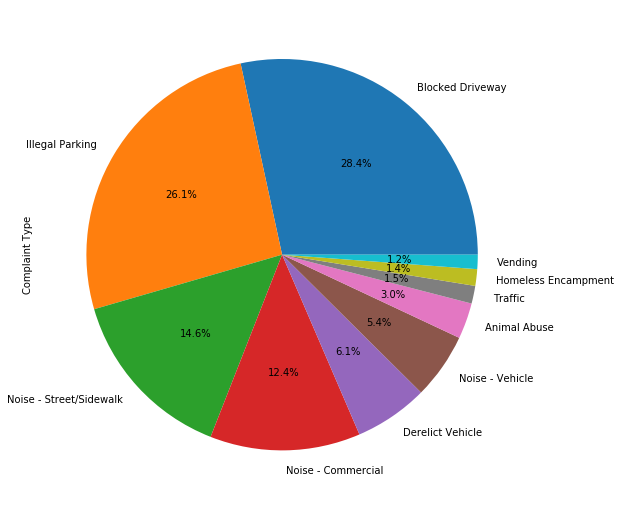

In [130]:
#As Mentioned Major, So taking Only Top 10 Complaint Types
complaint_counts[:10].plot(kind='pie',autopct='%.1f%%', figsize=(18,9))